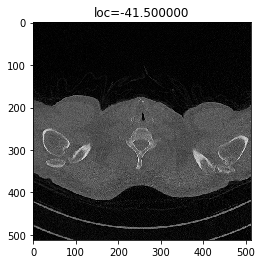

In [26]:
import numpy as np
import SimpleITK as sitk
import pydicom
import cv2 as cv
import numpy
from matplotlib import pyplot as plt

def read_dicom_data(file_name):#read dicom 
    file = sitk.ReadImage(file_name)
    data = sitk.GetArrayFromImage(file)

    data = np.squeeze(data, axis=0)
    data = np.int32(data)
    #pydicom
    dicom_dataset = pydicom.dcmread(file_name)   
    if hasattr(dicom_dataset, 'SliceLocation'): #3D
        slice_location = dicom_dataset.SliceLocation
    else:
        slice_location=0
    
    return data, slice_location

file_path = '/data/fjsdata/pulmonary/CT_CVTE_1209_DICOM_New/20190121/CT190121001_1.2.156.600734.2466462228.6412.1548031039.10/0002_000001_1.3.12.2.1107.5.1.4.74396.30000019012100341368900000001'
data, loc = read_dicom_data(file_path)
plt.title('loc=%f'%loc)
plt.imshow(data,'gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f5b9465dbd0>,
 Text(0.5, 1.0, 'original'))

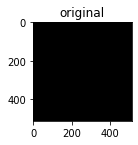

In [24]:
import numpy as np
import SimpleITK as sitk
import pydicom
import cv2 as cv
import numpy
from matplotlib import pyplot as plt

def read_dicom_data(file_name):
    file = sitk.ReadImage(file_name)
    data = sitk.GetArrayFromImage(file)

    data = np.squeeze(data, axis=0)
    data = np.int32(data)

    dicom_dataset = pydicom.dcmread(file_name)
    #http://dicom.nema.org/medical/dicom/current/output/chtml/part03/sect_C.7.6.2.html#table_C.7-10
    if hasattr(dicom_dataset, 'SliceLocation'):
        slice_location = dicom_dataset.SliceLocation
    else:
        slice_location=0

        # if dicom_dataset.BitsAllocated == 1:
        #     # single bits are used for representation of binary data
        #     format_str = 'uint8'
        # elif dicom_dataset.PixelRepresentation == 0:
        #     format_str = 'uint{}'.format(dicom_dataset.BitsAllocated)
        # elif dicom_dataset.PixelRepresentation == 1:
        #     format_str = 'int{}'.format(dicom_dataset.BitsAllocated)
        # else:
        #     format_str = 'bad_pixel_representation'
        # try:
        #     numpy_dtype = np.dtype(format_str)
        # except TypeError:
        #     msg = ("Data type not understood by NumPy: "
        #            "format='{}', PixelRepresentation={}, "
        #            "BitsAllocated={}".format(
        #         format_str,
        #         dicom_dataset.PixelRepresentation,
        #         dicom_dataset.BitsAllocated))
        #     raise TypeError(msg)
        #
        # # if dicom_dataset.is_little_endian != sys_is_little_endian:
        # #     numpy_dtype = numpy_dtype.newbyteorder('S')
        #
        # pixel_bytearray = dicom_dataset.PixelData
        #
        # if dicom_dataset.BitsAllocated == 1:
        #     # if single bits are used for binary representation, a uint8 array
        #     # has to be converted to a binary-valued array (that is 8 times bigger)
        #     try:
        #         pixel_array = np.unpackbits(
        #             np.frombuffer(pixel_bytearray, dtype='uint8'))
        #     except NotImplementedError:
        #         # PyPy2 does not implement numpy.unpackbits
        #         raise NotImplementedError(
        #             'Cannot handle BitsAllocated == 1 on this platform')
        # else:
        #     pixel_array = np.frombuffer(pixel_bytearray, dtype=numpy_dtype)
        # length_of_pixel_array = pixel_array.nbytes
        # expected_length = dicom_dataset.Rows * dicom_dataset.Columns
        # if ('NumberOfFrames' in dicom_dataset and
        #         dicom_dataset.NumberOfFrames > 1):
        #     expected_length *= dicom_dataset.NumberOfFrames
        # if ('SamplesPerPixel' in dicom_dataset and
        #         dicom_dataset.SamplesPerPixel > 1):
        #     expected_length *= dicom_dataset.SamplesPerPixel
        # if dicom_dataset.BitsAllocated > 8:
        #     expected_length *= (dicom_dataset.BitsAllocated // 8)
        # padded_length = expected_length
        # if expected_length & 1:
        #     padded_length += 1
        # if length_of_pixel_array != padded_length:
        #     raise AttributeError(
        #         "Amount of pixel data %d does not "
        #         "match the expected data %d" %
        #         (length_of_pixel_array, padded_length))
        # if expected_length != padded_length:
        #     pixel_array = pixel_array[:expected_length]
        # if dicom_dataset.Modality.lower().find('ct') >= 0:  # CT图像需要得到其CT值图像
        #     pixel_array = pixel_array * dicom_dataset.RescaleSlope + dicom_dataset.RescaleIntercept  # 获得图像的CT值
        # pixel_array = pixel_array.reshape(dicom_dataset.Rows, dicom_dataset.Columns * dicom_dataset.SamplesPerPixel)
    # return pixel_array, dicom_dataset.Rows, dicom_dataset.Columns, slice_location
    return data, data.shape[0], data.shape[1], slice_location

file_path = '/data/fjsdata/pulmonary/CT_CVTE_1209_DICOM_New/20190121/CT190121001_1.2.156.600734.2466462228.6412.1548031039.10/0502_000001_1.3.12.2.1107.5.1.4.74396.30000019012023545185800000083'
data, len_r, len_l, loc= read_dicom_data(file_path)
plt.subplot(231),plt.imshow(data,'gray'),plt.title('original')